### One-Hot Encoding
One-hot encoding is way to encode categorical features into integers. Say we have 0-9 labels (like in digit recoginzer). Each data-point in this data set belongs to a number in this set. One-hot encoding converts the label set into an array which has a value of 1 for a label and zero for all other labels.

This just means that you have a vector the length of the number of classes, and the label element is marked with a 1 while the other labels are set to 0. In the case of classifying digits from before, our label vector for the image of the number 4 would be:

$y = [0,0,0,0,1,0,0,0,0,0]$

Another example: Say there are two categories ["male", "female"]. There are two data points ["female", "male"], then we have:
one-hot encoded array as np.array([[0, 1], [1, 0]]). 

### Soft-max
Softmax function calculates class probabilities as output from the network. The softmax function squashes it's inputs, typically called *logits* or *logit* scores, to be between 0 and 1 and also normalizes the outputs such that they all sum to 1. This means the output of the softmax function is equivalent to a categorical probability distribution. It's the perfect function to use as the output activation for a network predicting multiple classes.


In [4]:
# Let's see how a soft-max function works
import numpy as np
logit_data = np.array([2.0, 1.0, 0.1]) # This is the input to the soft-max function
soft_max = np.exp(logit_data)/np.sum(np.exp(logit_data))
print (soft_max)
print ("Sum of the soft-max values is {0}".format(np.sum(soft_max)))

[ 0.65900114  0.24243297  0.09856589]
Sum of the soft-max values is 1.0


### Activation Functions
Sigmoid function as the activation function on our hidden units and, in the case of classification, on the output unit. However, this is not the only activation function you can use and actually has some drawbacks.

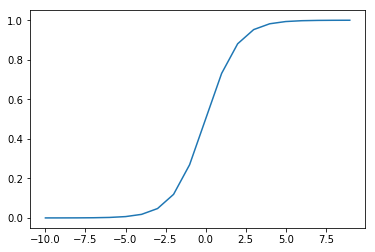

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
x = np.arange(-10, 10)
y = 1./(1 + np.exp(-x))
plt.plot(x, y)

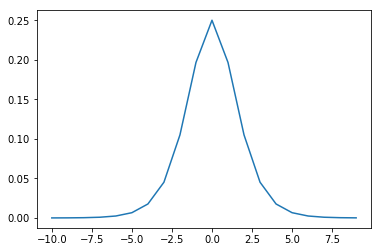

In [18]:
# Derviate of sigmoid
plt.plot(x, y*(1-y))

As noted in the backpropagation material, the derivative of the sigmoid maxes out at 0.25 (see above). This means when you're performing backpropagation with sigmoid units, the errors going back into the network will be shrunk by at least 75% at every layer. For layers close to the input layer, the weight updates will be tiny if you have a lot of layers and those weights will take a really long time to train. Due to this, sigmoids have fallen out of favor as activations on hidden units.

### Rectified-Linear units
$$f(x) = \max(0,x) $$
Instead of sigmoids, most recent deep learning networks use rectified linear units (ReLUs) for the hidden layers. A rectified linear unit has output 0 if the input is less than 0, and raw output otherwise. That is, if the input is greater than 0, the output is equal to the input.


[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   2.   3.   4.
   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.  16.  17.  18.  19.
  20.  21.  22.  23.  24.]


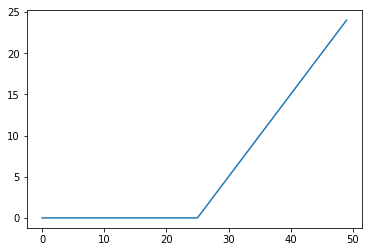

In [19]:
x = np.arange(-25, 25)
y = np.maximum(np.zeros((50,)), x)
print (y)
plt.plot(y)

### Categorical cross-entropy
We've been using the sum of squared errors as the cost function in our networks, but in those cases we only have singular (scalar) output values.

When you're using softmax, however, your output is a vector. One vector is the probability values from the output units. You can also express your data labels as a vector using what's called one-hot encoding.

And our output prediction vector could be something like below using softmax function.

$\hat{y}=[0.047,0.048,0.061,0.07,0.330,0.062,0.001,0.213,0.013,0.150]$.

We want our error to be proportional to how far apart these vectors are. To calculate this distance, we'll use the cross entropy. Then, our goal when training the network is to make our prediction vectors as close as possible to the label vectors by minimizing the cross entropy.

$$ D(\hat{y}, y) = -\Sigma_{j}y_j\ln \hat{y}_j $$

Remember this is not symmetrical. That means $D(y, \hat{y})\neq D(\hat{y},y)$

As you can see above, the cross entropy is the sum of the label elements times the natural log of the prediction probabilities. 

What's cool about using one-hot encoding for the label vector is that $y_j$ is 0 except for the one true class. Then, all terms in that sum except for where $y_j=1$ are zero and the cross entropy is simply $D=−\ln\hat{y}$ for the true label. For example, if your input image is of the digit 4 and it's labeled 4, then only the output of the unit corresponding to 4 matters in the cross entropy cost.


In [21]:
# Example of cross-entropy
y = np.array([0, 0, 0, 1, 0])
y_hat = np.array([0.27, 0.11, 0.33, 0.10, 0.19])
cross_entropy = -np.sum(y*np.log(y_hat))
print (cross_entropy)

2.30258509299
